In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)    #this rcParams will set the styling of all the plots that we create,apply the same configuration

In [3]:
movies=pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#finding the correlations, means if the budget increases the gross value is also expected to increase, how the feilds are correlated

## Cleaning the data

In [5]:
#check for missing data
movies.info()
#to find the ratio of missing values in each column(null values/total values)
for col in movies.columns:
    print(round(np.mean(movies[col].isnull()),3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.283
0.025
0.002
0.001


In [6]:
movies['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664           NaN
7665       58750.0
7666       15000.0
7667           NaN
Name: budget, Length: 7668, dtype: float64

In [7]:
movies['budget'].mean()

35589876.192650534

In [8]:
movies['budget'].fillna(movies['budget'].mean(),inplace=True)

In [9]:
movies[movies['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [10]:
movies['gross'].mean()

78500541.01778312

In [11]:
movies['gross'].fillna(movies['gross'].mean(),inplace=True)

In [12]:
movies['runtime'].fillna(movies['runtime'].mean(),inplace=True)

In [13]:
movies['company'].value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
Tim Burton Productions        1
PK 65 Films                   1
Name: company, Length: 2385, dtype: int64

In [14]:
#filling the null values with the most occuring once
movies['company'].fillna('Universal Pictures',inplace=True)

In [15]:
movies['rating'].fillna('R',inplace=True)

In [16]:
#changing the datatypes
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
movies['budget']=movies['budget'].astype('int64')
movies['gross']=movies['gross'].astype('int64')

In [18]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90.000000
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120.000000


In [19]:
#sort according to the gross revenue
movies.sort_values(by='gross',ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [20]:
#Pandas have an options system that lets you customize some aspects of its behavior, display-related options being those the user is most likely to adjust.
#to view all the rows:Using set_option(), we can change the default number of rows to be displayed
#pd.set_option('display.max_rows',None)

In [21]:
#check for duplicates and if any drop them
movies.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Universal Pictures,90.000000
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,Universal Pictures,120.000000


## Finding the correlations

<Axes: ylabel='Frequency'>

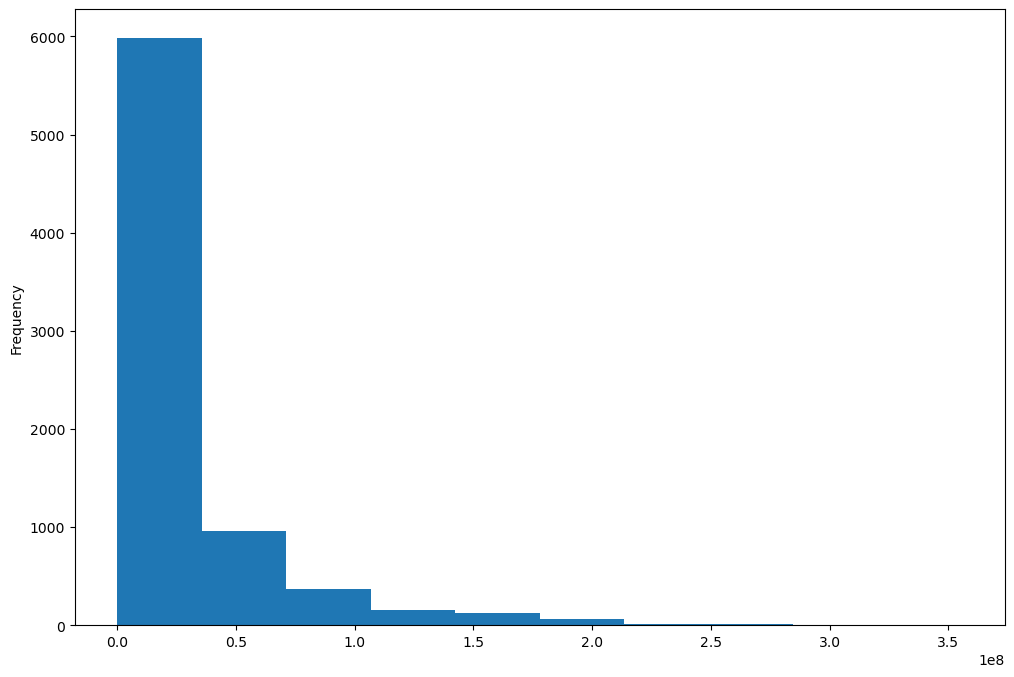

In [22]:
movies['budget'].plot(kind='hist')

Text(0.5, 1.0, 'Budget vs Gross Revenue')

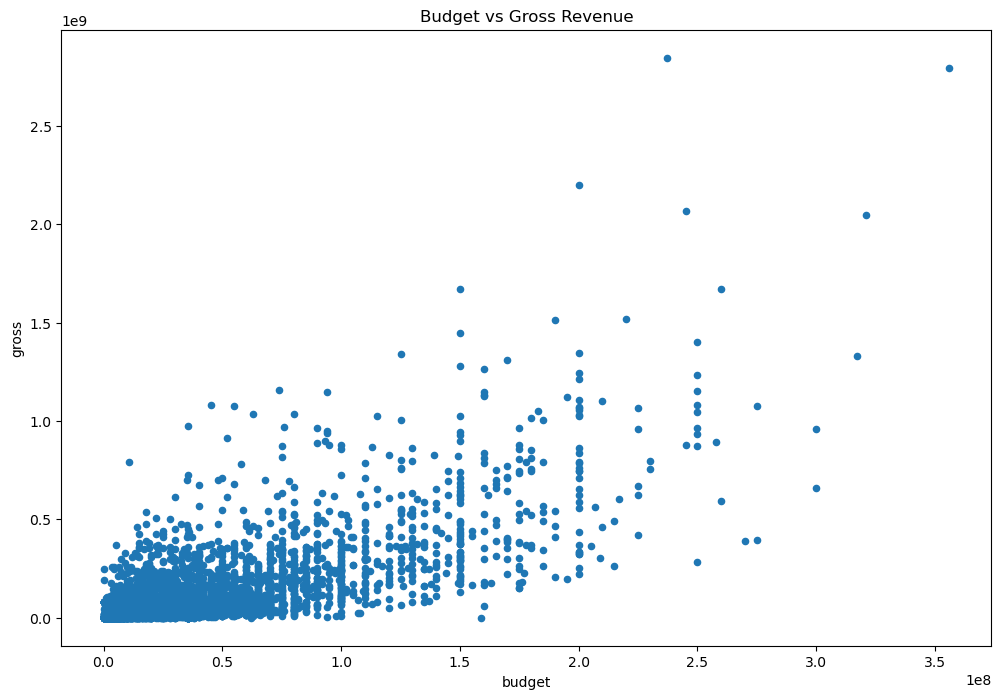

In [23]:
#compare the budget and gross revenue
movies.plot(kind='scatter',x='budget',y='gross')
plt.title("Budget vs Gross Revenue")

<Axes: xlabel='budget', ylabel='gross'>

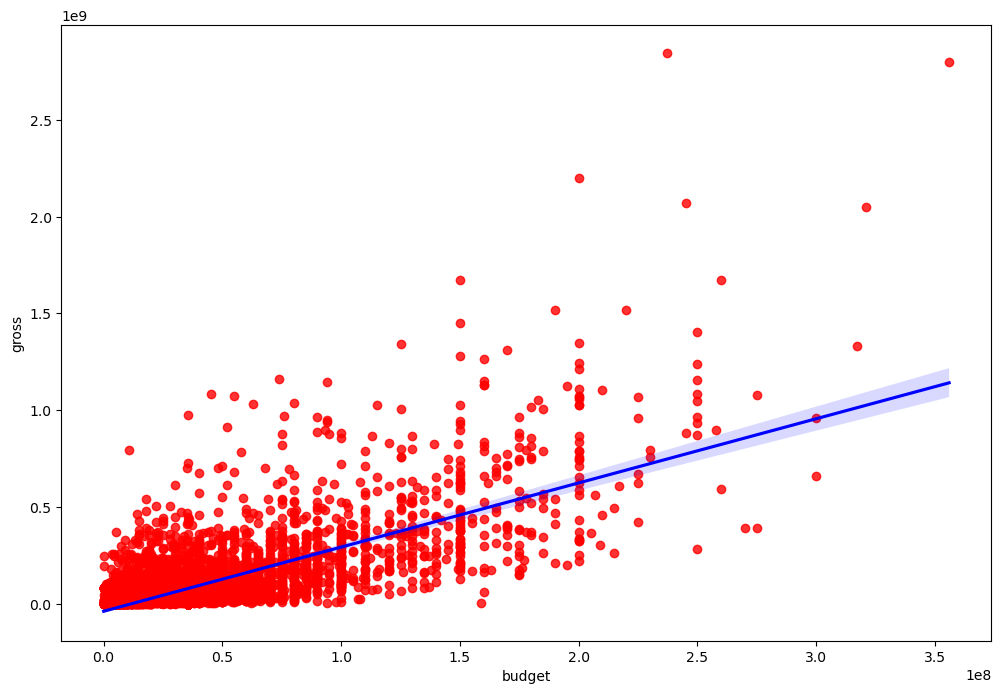

In [24]:
#positive correlation
sns.regplot(x='budget',y='gross',data=movies,scatter_kws={'color':'red'},line_kws={'color':'blue'})
#"scatter_kws" to provide style info for the points.[s for size], "line_kws" to provide style info for the line.different colors for the regression line and data points, color can be specified using the {scatter,line}_kws. This can help you better visualize the regression line, which can be obscured by a similarly-colored scatter plot.

In [25]:
#lets start looking at correlation
#df.corr():finds the pairwise correlation of each column in a DataFrame
#different methods of correlation:pearson(default),kendall,spearman
movies.corr()
#movies.corr(method='kendall')

C:\Users\User\AppData\Local\Temp\ipykernel_14272\4244062495.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120766
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399378
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309204
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399378,0.309204,0.265287,0.241335,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_14272\2897469866.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=movies.corr()


Text(0.5, 1.0, 'Correlation between numeric features')

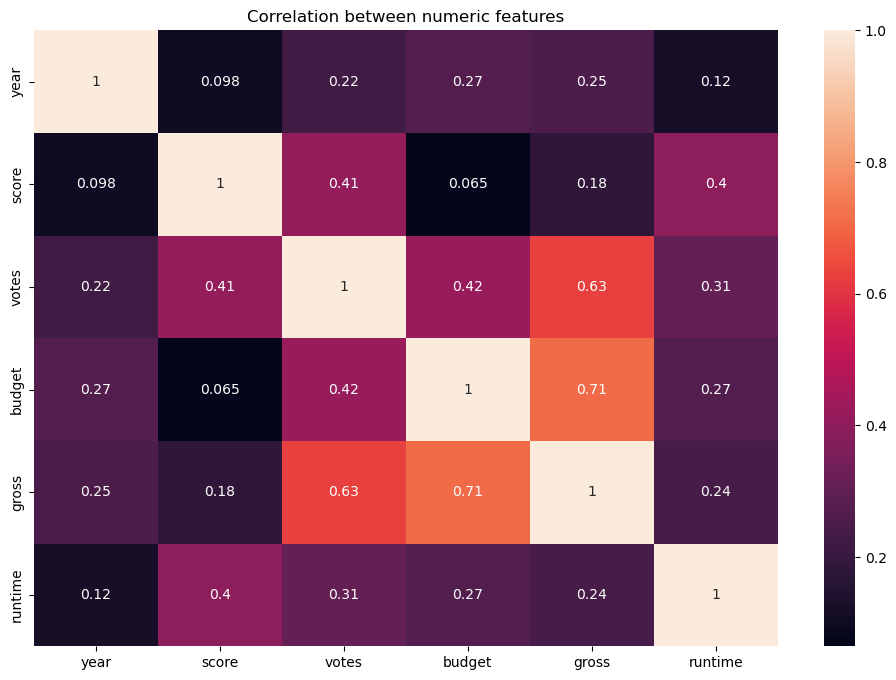

In [26]:
#high correlation between budget and gross revenue
corr_matrix=movies.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation between numeric features")

In [27]:
#company
#company is not numeric lets convert it to numeric representation
movies['company']=movies['company'].astype('category')

In [28]:
movies_category=movies

In [29]:
#cat codes are for categorical data,it returns a series of codes for each category
movies_category['company']=movies_category['company'].cat.codes

In [30]:
movies_category

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,2319,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,731,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,1540,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,1812,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,1777,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,2281,90.000000
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,539,90.000000
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,941,107.261613
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,2281,120.000000


C:\Users\User\AppData\Local\Temp\ipykernel_14272\3679738726.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=movies_category.corr()


Text(0.5, 1.0, 'Correlation between numeric features')

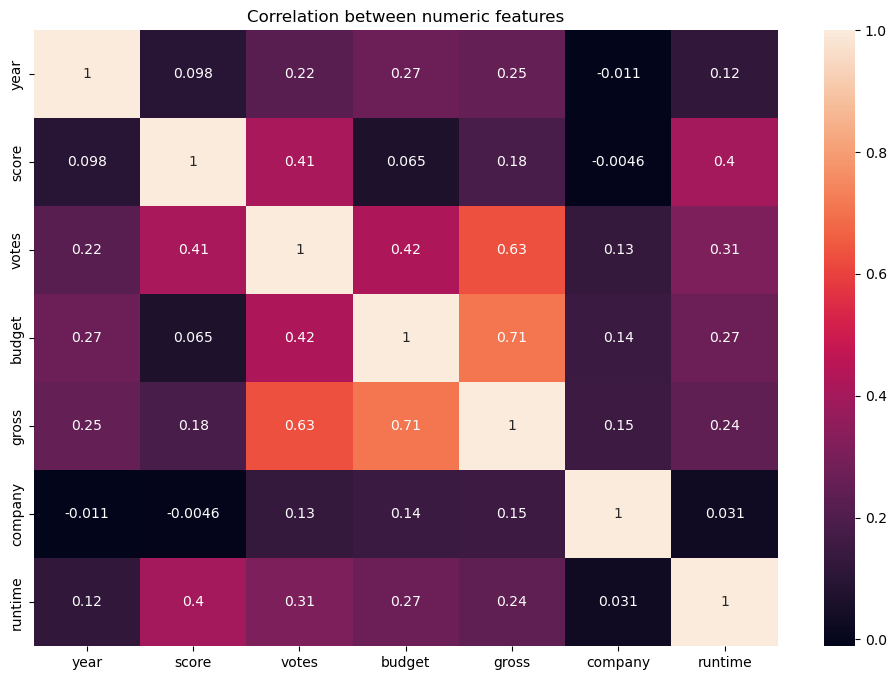

In [31]:
corr_matrix=movies_category.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation between numeric features")

In [32]:
#organize to see which have the highest correlation by unstacking
movies_category.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_14272\1411196924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_category.corr()


,year,score,votes,budget,gross,company,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,-0.011438,0.120766
score,0.097995,1.000000,0.409182,0.064554,0.182868,-0.004595,0.399378
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.130668,0.309204
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.142804,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.151228,0.241335
company,-0.011438,-0.004595,0.130668,0.142804,0.151228,1.000000,0.031040
runtime,0.120766,0.399378,0.309204,0.265287,0.241335,0.031040,1.000000


In [33]:
corr_matrix=movies_category.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_14272\4230088030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=movies_category.corr()


In [34]:
corr_pairs=corr_matrix.unstack()
corr_pairs
corr_pairs.sort_values()

year     company   -0.011438
company  year      -0.011438
         score     -0.004595
score    company   -0.004595
runtime  company    0.031040
company  runtime    0.031040
budget   score      0.064554
score    budget     0.064554
year     score      0.097995
score    year       0.097995
runtime  year       0.120766
year     runtime    0.120766
votes    company    0.130668
company  votes      0.130668
         budget     0.142804
budget   company    0.142804
gross    company    0.151228
company  gross      0.151228
score    gross      0.182868
gross    score      0.182868
votes    year       0.222945
year     votes      0.222945
gross    runtime    0.241335
runtime  gross      0.241335
year     gross      0.252042
gross    year       0.252042
runtime  budget     0.265287
budget   runtime    0.265287
         year       0.265578
year     budget     0.265578
runtime  votes      0.309204
votes    runtime    0.309204
score    runtime    0.399378
runtime  score      0.399378
votes    score

In [35]:
high_correlation=corr_pairs[corr_pairs.sort_values()>0.5]
high_correlation

year     year       1.000000
score    score      1.000000
votes    votes      1.000000
         gross      0.628713
budget   budget     1.000000
         gross      0.711270
gross    votes      0.628713
         budget     0.711270
         gross      1.000000
company  company    1.000000
runtime  runtime    1.000000
dtype: float64

In [36]:
#votes and budget have the highest correlation with gross